In [1]:
!pip install tf-nightly-2.0-preview

     |████████████████████████████████| 95.2MB 104kB/s 
     |████████████████████████████████| 3.8MB 40.4MB/s 
     |████████████████████████████████| 450kB 42.9MB/s 
     |████████████████████████████████| 81kB 10.0MB/s 
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.2 which is incompatible.
ERROR: tb-nightly 2.1.0a20191206 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2


In [2]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [0]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.datasets import fashion_mnist



In [0]:
##Load the data
#Clean the data if necessary (it will be)
#Create and fit a baseline Keras MLP model to the data.
#Hyperparameter tune (at least) the following parameters:

In [0]:
#Load data
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [40]:
#standarize(clean?)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train[:10])

[[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
   0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
   0.8252202 ]
 [-0.40342651  2.99178419 -1.33391162 -0.25683275 -1.21518188  1.89434613
  -1.91036058  1.24758524 -0.85646254 -0.34843254 -1.71818909  0.43190599
  -1.32920239]
 [ 0.1249402  -0.48361547  1.0283258  -0.25683275  0.62864202 -1.82968811
   1.11048828 -1.18743907  1.67588577  1.5652875   0.78447637  0.22061726
  -1.30850006]
 [-0.40149354 -0.48361547 -0.86940196 -0.25683275 -0.3615597  -0.3245576
  -1.23667187  1.10717989 -0.51114231 -1.094663    0.78447637  0.44807713
  -0.65292624]
 [-0.0056343  -0.48361547  1.0283258  -0.25683275  1.32861221  0.15364225
   0.69480801 -0.57857203  1.67588577  1.5652875   0.78447637  0.3898823
   0.26349695]
 [-0.37502238 -0.48361547 -0.54747912 -0.25683275 -0.54935658 -0.78865126
   0.18954148  0.48371503 -0.51114231 -0.71552978  0.51145832  0.38669063
  -0.13812828]
 [ 0.58963463 -0.48361547

In [41]:
X_train.shape

(404, 13)

In [0]:
#import model and layers needed:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np

np.random.seed(812)

In [43]:
#instantiate model
model = Sequential(name='Boston_Housing_1st_attempt')

#add layers to model
model.add(Dense(50, input_dim=13, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))


#no activation function for output layer cos it's a regression problem
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

#inspect our new architecture
model.summary()

Model: "Boston_Housing_1st_attempt"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                700       
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 5,851
Trainable params: 5,851
Non-trainable params: 0
_________________________________________________________________


In [0]:
#fit the model
history = model.fit(X_train, y_train, epochs=50, verbose=False, validation_split=("0"), validation_data=(X_test, y_test))

In [45]:
model.evaluate(X_train, y_train)

404/404 [==============================] - 0s 63us/sample - loss: 7.1491


7.149117668076317

In [46]:
#use history object to visualize train vs test losses:
history.history.keys()

dict_keys(['loss', 'val_loss'])

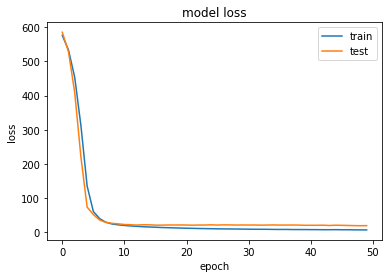

In [47]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right' )
plt.show()

In [48]:
#compare with linear regression
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
from sklearn.metrics import mean_squared_error
print('training data linear regression:', mean_squared_error(model2.predict(X_train), y_train))
print('training data neural network:', mean_squared_error(model.predict(X_train), y_train))

training data linear regression: 22.00480083834814
training data neural network: 7.149116474566541


In [52]:
print('training data linear regression:', mean_squared_error(model2.predict(X_test), y_test))
print('training data neural network:', mean_squared_error(model.predict(X_test), y_test))

training data linear regression: 23.195599256423
training data neural network: 19.908884897929205


In [53]:
#load the data
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import keras

Using TensorFlow backend.


In [54]:
#train and test sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
#input image dimensions
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows * img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows * img_cols)

In [0]:
#normalize data
X_train = X_train / 255
X_test = X_test / 255

In [57]:
#make outputs categoricals
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_test.shape

(10000, 10)

In [65]:
#instantiate model:
model2 = Sequential(name='MNIST_Fashion_1st_Attempt')

#add layers to model:
model2.add(Dense(100, input_dim=784, activation="relu"))
model2.add(Dense(100, activation="relu"))
model2.add(Dense(100, activation="relu"))


#Using softmax activation function because it's a multi-class classification problem
model2.add(Dense(10, activation="softmax"))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#inspecting the new achitecture
model2.summary()

Model: "MNIST_Fashion_1st_Attempt"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


In [66]:
#fit the model
history = model2.fit(X_train,y_train, epochs=50, verbose=True, validation_split=(0), validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 98us/sample - loss: 0.4961 - acc: 0.8211 - val_loss: 0.4465 - val_acc: 0.8357
Epoch 2/50
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3682 - acc: 0.8640 - val_loss: 0.4046 - val_acc: 0.8538
Epoch 3/50
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3339 - acc: 0.8754 - val_loss: 0.3980 - val_acc: 0.8594
Epoch 4/50
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3120 - acc: 0.8837 - val_loss: 0.3645 - val_acc: 0.8639
Epoch 5/50
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2942 - acc: 0.8910 - val_loss: 0.3787 - val_acc: 0.8641
Epoch 6/50
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2807 - acc: 0.8950 - val_loss: 0.3484 - val_acc: 0.8785
Epoch 7/50
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2689 - acc: 0.8988 - val_loss: 0

In [67]:
model2.evaluate(X_train,y_train)

60000/60000 [==============================] - 2s 35us/sample - loss: 0.1074 - acc: 0.9579


[0.10742821776376417, 0.95786667]

In [68]:
model2.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.6078 - acc: 0.8898


[0.607849097135663, 0.8898]